# Projeto

In [1]:
import graph_tool_extras as gte
import pandas as pd
import csv
from itertools import combinations

Você **PODE** usar este notebook como referência para escrever seu próprio código, mas **NÃO PODE** usar uma proposta de rede que seja igual ou análoga.

## Dados

[Craft Beers Dataset](https://www.kaggle.com/datasets/nickhould/craft-cans)

In [2]:
PATH = './amazon.csv'

## Por que não usar uma proposta igual ou análoga a esta?

Porque a rede é formada por subredes completas e isoladas. Nenhuma métrica de rede é interessante.

## Leitura dos dados em disco

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o terceiro notebook da Aula 3.

In [3]:
# Criar um grafo híbrido não dirigido
g = gte.Graph(directed=False)

# Adicionar propriedade para diferenciar os tipos de vértices
g.add_vp('type')

# cor nos vertices
vertex_type = g.new_vertex_property('string')
vertex_color = g.new_vertex_property('vector<double>')
g.vertex_properties['type'] = vertex_type
g.vertex_properties['color'] = vertex_color

# Função para criar ou recuperar vértices
def get_or_add_vertex(g, id, tipo):
    v = g.vertex_by_id(id)
    if v is None:
        v = g.add_vertex_by_id(id)
        v['type'] = tipo
    return v


# Dicionário que armazena os produtos e suas categorias
produtos = {}

with open(PATH) as file:
    reader = csv.reader(file)
    next(reader)  # Ignorar cabeçalho

    for line in reader:
        produto = line[0]  # ID do produto
        categorias = set(line[2].split('|')) 
        
        # Criar vértice do produto
        u = get_or_add_vertex(g, produto, 'produto')

        # Adicionar conexões com categorias
        for categoria in categorias:
            categoria = categoria.strip()
            v = get_or_add_vertex(g, categoria, 'categoria')
            g.add_edge_by_ids(produto, categoria)  # Conectar produto a categoria


# Criar arestas se compartilharem 3+ categorias

# A função combinations é útil para iterar sobre pares
# se a ordem NÃO importa. (se importa, use permutations).

for produto1, produto2 in combinations(produtos.keys(), 2):
    if len(produtos[produto1] & produtos[produto2]) >= 3:  # Interseção ≥ 3
        g.add_edge_by_ids(produto1, produto2)

print(f"Número total de vértices: {g.num_vertices()}")
print(f"Número total de arestas: {g.num_edges()}")

Número total de vértices: 1668
Número total de arestas: 6307


## Construção do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o terceiro notebook da Aula 3.

## Finalização do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o quarto e quinto notebooks da Aula 3.

In [4]:
from graph_tool import draw

In [5]:
layout = draw.sfdp_layout(g)

In [6]:
gte.clean(g)

gte.move(g, layout)


In [7]:
gte.save(g, 'amazon.net.gz')


## Visualização do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o quarto e quinto notebooks da Aula 3.

In [8]:
import netpixi

In [9]:
netpixi.render('amazon.net.gz', infinite=True);

<div class="alert alert-block alert-info">
   <strong>DICA:</strong> Você pode clicar na aba
   
   à esquerda para navegar por seção.
</div>

### Cálculo Degree - Híbrida

In [10]:
import graph_tool_extras as gteDH
import pandas as pd
import csv

In [11]:
gDH = gteDH.load('./amazon.net.gz')

cDH = gteDH.total_degree(gDH)

gDH.add_vp('degree', cDH)
gteDH.clean(gDH)
gteDH.save(gDH, 'degree1.net.gz')
r = netpixi.render('degree1.net.gz')


In [12]:
r.vertex_scale('degree', 10, 30)

### Cálculo Restrição Híbrida

In [13]:
import netpixi
import graph_tool_extras as gteRH

In [14]:
gRH = gteRH.load('./amazon.net.gz')

cRH = gteRH.burt_constraint(gRH)

gRH.add_vp('burt_constraint', cRH)

In [15]:
gteRH.save(gRH, 'structural_holes.net.gz')
r = netpixi.render('structural_holes.net.gz')

In [16]:
r.vertex_scale('burt_constraint', 10, 30)

## Cálculos Extras

In [17]:
# Supondo que 'gRH' seja a rede híbrida carregada
cRH = gteRH.burt_constraint(gRH)  # Cálculo da restrição de Burt

gRH.add_vp('burt_constraint', cRH)  # Atribui a propriedade de restrição de Burt

# Para ver a restrição de Burt de cada vértice
for v in gRH.vertices():
    print(f"Vértice {v} tem restrição de Burt {v['burt_constraint']}")

Vértice 0 tem restrição de Burt 0.6000000000000003
Vértice 1 tem restrição de Burt 0.016354166666666607
Vértice 2 tem restrição de Burt 0.005774600529216596
Vértice 3 tem restrição de Burt 0.017112122161027057
Vértice 4 tem restrição de Burt 0.013760888776669724
Vértice 5 tem restrição de Burt 0.007502015004029964
Vértice 6 tem restrição de Burt 0.6000000000000003
Vértice 7 tem restrição de Burt 0.6000000000000003
Vértice 8 tem restrição de Burt 0.6000000000000003
Vértice 9 tem restrição de Burt 0.6000000000000003
Vértice 10 tem restrição de Burt 0.6000000000000003
Vértice 11 tem restrição de Burt 0.6000000000000003
Vértice 12 tem restrição de Burt 0.6000000000000003
Vértice 13 tem restrição de Burt 0.25
Vértice 14 tem restrição de Burt 0.05017301038062283
Vértice 15 tem restrição de Burt 0.11000000000000004
Vértice 16 tem restrição de Burt 0.12962962962962965
Vértice 17 tem restrição de Burt 0.40000000000000013
Vértice 18 tem restrição de Burt 0.6000000000000003
Vértice 19 tem restriç

In [18]:
# Calculando a restrição de Burt para as redes ego-centradas
ego_burt_constraints = {}

for v in gRH.vertices():
    ego_network = gRH.vertex(v).out_neighbors()
    
    # Calcular a restrição de Burt para os vértices da rede ego-centrada
    ego_burt_constraints[v] = v['burt_constraint']
    
    print(f"Ego-centrada do vértice {v}: Restrição de Burt = {v['burt_constraint']}")
    
# Agora, você pode analisar a distribuição

Ego-centrada do vértice 0: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 1: Restrição de Burt = 0.016354166666666607
Ego-centrada do vértice 2: Restrição de Burt = 0.005774600529216596
Ego-centrada do vértice 3: Restrição de Burt = 0.017112122161027057
Ego-centrada do vértice 4: Restrição de Burt = 0.013760888776669724
Ego-centrada do vértice 5: Restrição de Burt = 0.007502015004029964
Ego-centrada do vértice 6: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 7: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 8: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 9: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 10: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 11: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 12: Restrição de Burt = 0.6000000000000003
Ego-centrada do vértice 13: Restrição de Burt = 0.25
Ego-centrada do vértice 14: Restrição de Burt = 0.05017301038062283
Ego-cent

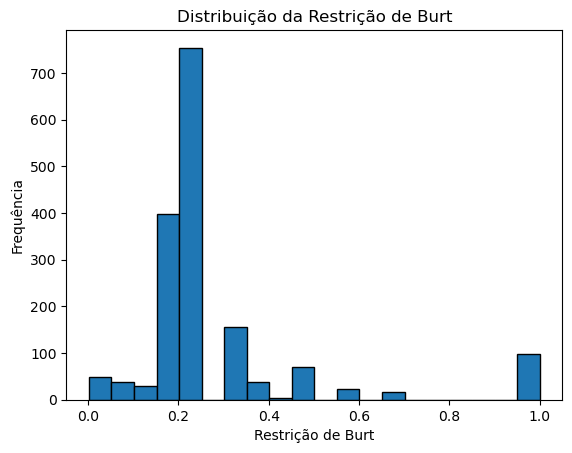

In [19]:
import matplotlib.pyplot as plt

# Extrair as restrições de Burt
burt_values = [v['burt_constraint'] for v in gRH.vertices()]

# Criar histograma
plt.hist(burt_values, bins=20, edgecolor='black')
plt.title('Distribuição da Restrição de Burt')
plt.xlabel('Restrição de Burt')
plt.ylabel('Frequência')
plt.show()

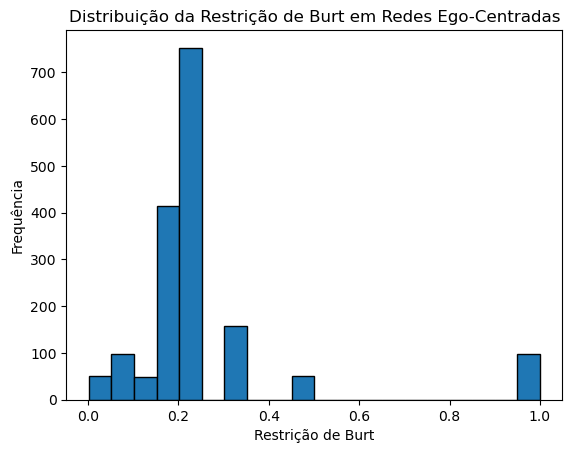

In [22]:
import matplotlib.pyplot as plt
from graph_tool.all import Graph, graph_draw

# Suponha que gRH já está carregado e é a rede híbrida
# Carregamento e preparação da rede híbrida
# Substituir 'gteRH.load' pelo método de carregamento correto se necessário
gRH = gteRH.load('./amazon.net.gz')

# Dicionário para guardar as restrições de Burt das redes ego-centradas
ego_burt_constraints = {}

# Calcular a restrição de Burt para cada rede ego-centrada
for v in gRH.vertices():
    ego_network = Graph(directed=False)
    v_map = ego_network.add_vertex()  # Adiciona o vértice central

    v_neighbors = {ego_network.add_vertex(): n for n in v.out_neighbors()}  # Mapeamento dos vizinhos
    
    for n_vertex, n_orig in v_neighbors.items():
        ego_network.add_edge(v_map, n_vertex)  # Adiciona as arestas para cada vizinho

    # Agora, calcular a restrição de Burt manualmente:
    if len(v_neighbors) == 0:
        ego_burt_constraints[v] = 0
    else:
        p_ij = {n: 1 / len(v_neighbors) for n in v_neighbors}
        burt_constraint = sum(p**2 for p in p_ij.values())
        ego_burt_constraints[v] = burt_constraint

# Criando um histograma para visualizar a distribuição de restrição de Burt
burt_values = list(ego_burt_constraints.values())
plt.hist(burt_values, bins=20, edgecolor='black')
plt.title('Distribuição da Restrição de Burt em Redes Ego-Centradas')
plt.xlabel('Restrição de Burt')
plt.ylabel('Frequência')
plt.show()


## Rede Two Mode

Produto com Produto (com categorias semelhantes) Categoria com categoria (mais vezes juntas)

In [27]:
import graph_tool_extras as gte2
import pandas as pd
import csv

In [28]:
PATH = './amazon.csv'

In [29]:
# Para uma two-mode, não faz sentido ser dirigido.
g2 = gte2.Graph(directed=False)

# Uma two-mode precisa de alguma propriedade que
# permite diferenciar os dois tipos de vértice.
g2.add_vp('type')

g2.add_vp('color')  # Adiciona uma nova propriedade para a cor dos vértices

# Dicionários auxiliares para relacionamento posterior
categoria_para_produtos = {}
produto_para_categorias = {}

# O mesmo identificador de vértice pode aparecer em várias
# linhas diferentes, então esta função é conveniente.
def get_or_add_vertex(g2, id):
    u2 = g2.vertex_by_id(id)
    if u2 is None:
        u2 = g2.add_vertex_by_id(id)
    return u2

with open(PATH) as file:
    reader = csv.reader(file)

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(reader)

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    for line in reader:
        # O nome da companhia NÃO é único. Vamos usar como
        # identificador a combinação do nome e do país.
        produto = f'{line[0]}'
        u2 = get_or_add_vertex(g2, produto)
        u2['type'] = 'produto'

        # Vamos usar o nome da indústria como o outro identificador.
        categorias = set(line[2].split('|'))  

        produto_para_categorias[produto] = categorias  # Salva para relacionamentos futuros

        for categoria in categorias:
            v2 = get_or_add_vertex(g2, categoria)
            v2['type'] = 'categoria'

            # Armazena o relacionamento categoria -> produtos
            if categoria not in categoria_para_produtos:
                categoria_para_produtos[categoria] = set()
            categoria_para_produtos[categoria].add(produto)

            # Como é two-mode, arestas são de um tipo para outro.
            g2.add_edge_by_ids(produto, categoria)

# Agora conectamos produtos com produtos que compartilham categorias
for produto1, categorias1 in produto_para_categorias.items():
    for produto2, categorias2 in produto_para_categorias.items():
        if produto1 != produto2 and categorias1 & categorias2:
            g2.add_edge_by_ids(produto1, produto2)

# Conectar categorias que aparecem juntas em pelo menos 3 produtos diferentes
for categoria1, produtos1 in categoria_para_produtos.items():
    for categoria2, produtos2 in categoria_para_produtos.items():
        if categoria1 != categoria2 and len(produtos1 & produtos2) >= 3:
            g2.add_edge_by_ids(categoria1, categoria2)

In [30]:
from graph_tool import draw

In [31]:
layout = draw.sfdp_layout(g2)

In [32]:
gte2.clean(g2)
gte2.move(g2, layout)

In [33]:
gte2.save(g2, 'amazon2.net.gz')

In [34]:
import netpixi

In [35]:
netpixi.render('amazon2.net.gz');

## Cálculo Degree

In [36]:
import graph_tool_extras as gte3
import pandas as pd
import csv

In [37]:
g3 = gte3.load('./amazon2.net.gz')

c = gte3.total_degree(g3)

g3.add_vp('degree', c)

In [38]:

gte3.clean(g3)


<Graph object, undirected, with 1033 vertices and 393493 edges, 5 internal vertex properties, at 0x7f5b40210f50>

In [39]:

gte3.save(g3, 'degree.net.gz')

In [40]:

r = netpixi.render('degree.net.gz')

In [41]:
r.vertex_scale('degree', 10, 30)

### Cálculo Betweennes

In [42]:
import netpixi
import graph_tool_extras as gte4

from graph_tool import centrality

In [43]:
g4 = gte4.load('./amazon2.net.gz')

# Na verdade, o método devolve duas propriedades,
# mas estamos interessados apenas na primeira.
c2, _ = centrality.betweenness(g4)

g4.add_vp('betweenness', c2)

In [44]:
gte4.save(g4, 'betweenness.net.gz')

In [45]:
r = netpixi.render('betweenness.net.gz')

In [46]:
r.vertex_scale('betweenness', 10, 30)

### Cálculo Closeness

In [47]:
import netpixi
import graph_tool_extras as gte5

from graph_tool import centrality

In [48]:
g5 = gte5.load('./amazon2.net.gz')

# O parâmetro harmonic=True é necessário para garantir
# que a fórmula seja exatamente a definida acima.
c3 = centrality.closeness(g5, harmonic=True)

g5.add_vp('closeness', c3)

In [49]:
gte5.save(g5, 'closeness.net.gz')


In [50]:
r = netpixi.render('closeness.net.gz')

In [51]:
r.vertex_scale('closeness', 10, 30)

## Cálculos Extras

In [52]:
import numpy as np

# Usaremos 'id' como nome da categoria
vertex_name_property = 'id'  

# Criar dicionários para armazenar as métricas das categorias
degree = {v: g3.vp.degree[v] for v in g3.vertices() if g3.vp.type[v] == 'categoria'}
betweenness = {v: g4.vp.betweenness[v] for v in g4.vertices() if g4.vp.type[v] == 'categoria'}
closeness = {v: g5.vp.closeness[v] for v in g5.vertices() if g5.vp.type[v] == 'categoria'}

# Função para normalizar os valores no intervalo [0,1]
def normalize(dic):
    values = np.array(list(dic.values()))
    min_v, max_v = values.min(), values.max()
    return {k: (v - min_v) / (max_v - min_v) if max_v > min_v else 0 for k, v in dic.items()}

degree_norm = normalize(degree)
betweenness_norm = normalize(betweenness)
closeness_norm = normalize(closeness)

# Combina as métricas normalizadas
combined_centrality = {
    k: degree_norm.get(k, 0) + betweenness_norm.get(k, 0) + closeness_norm.get(k, 0)
    for k in degree.keys()
}

# Ordena as categorias por centralidade total
top_categories = sorted(combined_centrality.items(), key=lambda x: x[1], reverse=True)

# Exibe as 10 categorias mais centrais com seus nomes
print("Top 10 categorias mais centrais:")
for cat, score in top_categories[:10]:
    print(g3.vp[vertex_name_property][cat], score)


Top 10 categorias mais centrais:
Electronics 3.0
Computers&Accessories 2.641370415676465
Home&Kitchen 2.2239804147081887
Accessories&Peripherals 1.965825107729898
Kitchen&HomeAppliances 1.4549343979074272
Cables 1.4500628896190584
HomeTheater,TV&Video 1.1344172569048148
Mobiles&Accessories 1.0937457528182661
Cables&Accessories 1.066660393824077
USBCables 1.0506270638355968


In [ ]:
from graph_tool.all import *

# Carregar o grafo (descompacte e use o formato correto do arquivo)
#g = load_graph('amazon2.net.gz')
g = gteDH.load('./amazon2.net.gz')

# Passo 1: Detectar comunidades utilizando o algoritmo Louvain
# Detectar as comunidades com o algoritmo de modularidade (Louvain)
state = community.detect_community(g)

# Passo 2: Identificar as arestas entre diferentes comunidades
inter_community_edges = []
for e in g.edges():
    u, v = e.source(), e.target()
    if state[u] != state[v]:  # Aresta conecta comunidades diferentes
        inter_community_edges.append(e)

# Passo 3: Verificar as categorias associadas às arestas
category_communities = {}
for v in g.vertices():
    if g.vp.type[v] == 'categoria':  # Verificar se é uma categoria
        connected_communities = set(state[u] for u in v.out_neighbors())
        category_communities[v] = connected_communities

# Passo 4: Categorias que conectam comunidades distintas
bridging_categories = {v: len(comms) for v, comms in category_communities.items() if len(comms) > 1}

# Ordenar as categorias que conectam mais comunidades
sorted_bridging_categories = sorted(bridging_categories.items(), key=lambda x: x[1], reverse=True)

# Exibir as categorias mais importantes
print("Categorias que conectam comunidades distintas:")
for cat, num_comms in sorted_bridging_categories[:10]:
    print(f"Categoria {g.vp.id[cat]} conecta {num_comms} comunidades.")


In [63]:
from graph_tool.all import *

# Carregar o grafo
g = gteDH.load('./amazon2.net.gz')

# Passo 1: Detectar comunidades utilizando o algoritmo Louvain
state = minimize_blockmodel_dl(g)  # Utiliza a inferência de modelo baseado em descrição de comprimento mínimo

# Passo 2: Identificar as arestas entre diferentes comunidades
inter_community_edges = []
for e in g.edges():
    u, v = e.source(), e.target()
    if state.get_blocks()[u] != state.get_blocks()[v]:  # Aresta conecta comunidades diferentes
        inter_community_edges.append(e)

# Passo 3: Verificar as categorias associadas às arestas
category_communities = {}
for v in g.vertices():
    if g.vp['type'][v] == 'categoria':  # Certifique-se de acessar corretamente a propriedade
        connected_communities = set(state.get_blocks()[u] for u in v.out_neighbors())
        category_communities[v] = connected_communities

# Passo 4: Categorias que conectam comunidades distintas
bridging_categories = {v: len(comms) for v, comms in category_communities.items() if len(comms) > 1}

# Ordenar as categorias que conectam mais comunidades
sorted_bridging_categories = sorted(bridging_categories.items(), key=lambda x: x[1], reverse=True)

# Exibir as categorias mais importantes
print("Categorias que conectam comunidades distintas:")
for cat, num_comms in sorted_bridging_categories[:10]:
    print(f"Categoria {g.vp['id'][cat]} conecta {num_comms} comunidades.")  # Ajuste conforme a propriedade correta para o nome/id da categoria


Categorias que conectam comunidades distintas:
Categoria Home&Kitchen conecta 6 comunidades.
Categoria Computers&Accessories conecta 5 comunidades.
Categoria Accessories&Peripherals conecta 5 comunidades.
Categoria Cables conecta 5 comunidades.
Categoria Kitchen&HomeAppliances conecta 5 comunidades.
Categoria Vacuum,Cleaning&Ironing conecta 5 comunidades.
Categoria Coffee,Tea&Espresso conecta 5 comunidades.
Categoria HomeTheater,TV&Video conecta 4 comunidades.
Categoria Accessories conecta 4 comunidades.
Categoria Electronics conecta 4 comunidades.
